In [4]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from google.colab import drive

In [5]:
# importing data sets
from google.colab import files
uploaded = files.upload()

Saving test-data.csv to test-data (1).csv
Saving train-data.csv to train-data (1).csv


In [6]:
# loading the dataset
train_df = pd.read_csv("train-data.csv", index_col=False)

In [7]:
# cleaning the dataset
# Remove unnecessary column if exists
if 'Unnamed: 0' in train_df.columns:
    train_df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
# Removing duplicates
train_df.drop_duplicates(inplace=True)

In [9]:
# Function to extract numeric values from strings (e.g. '23.4 kmpl' -> 23.4)
def parse_numeric(value):
    if pd.isnull(value):
        return np.nan
    match = re.search(r"([0-9]*\.?[0-9]+)", str(value))
    return float(match.group(1)) if match else np.nan

In [10]:

# Apply numeric conversion
train_df['Mileage_Num'] = train_df['Mileage'].apply(parse_numeric)
train_df['Engine_CC']   = train_df['Engine'].apply(parse_numeric)
train_df['Power_BHP']   = train_df['Power'].apply(parse_numeric)


In [11]:

# Remove outliers using IQR
def remove_outliers(df, columns):
    cleaned = df.copy()
    for col in columns:
        Q1 = cleaned[col].quantile(0.25)
        Q3 = cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        cleaned = cleaned[(cleaned[col] >= lower) & (cleaned[col] <= upper)]
    return cleaned

cleaned_df = remove_outliers(
    train_df,
    ['Kilometers_Driven', 'Mileage_Num', 'Engine_CC', 'Power_BHP', 'Price']
)


In [12]:
#Print results
print('Original training size:', train_df.shape[0], 'After removal:', cleaned_df.shape[0])


Original training size: 6019 After removal: 4786


Original training size: 6019 After removal: 4786


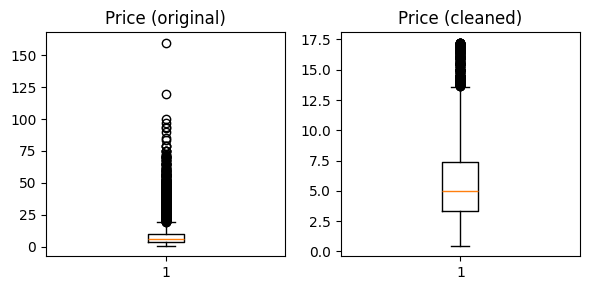

In [13]:
 # Print results
print('Original training size:', train_df.shape[0], 'After removal:', cleaned_df.shape[0])

# --- Step 7: Visualize effect of outlier removal ---
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.boxplot(train_df['Price'])
plt.title('Price (original)')

plt.subplot(1,2,2)
plt.boxplot(cleaned_df['Price'])
plt.title('Price (cleaned)')

plt.tight_layout()
plt.show()